# PROBLEM STATEMENT

- You have been hired as a consultant to a major Automotive Manufacturer and you have been tasked to develop a model to predict the impact of increasing the vehicle horsepower (HP) on fuel economy (Mileage Per Gallon (MPG)). You gathered the data:
- Data set:
    - Independant variable X: Vehicle Horse Power 
    - Dependant variable Y: Mileage Per Gallon (MPG) 

# STEP #1: LIBRARIES IMPORT


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# STEP #2: IMPORT DATASET

In [2]:
# download the dataset

!wget https://hr-projects-assets-prod.s3.amazonaws.com/fcc9jp6dfl5/e24be40cf3d07466eec04a5dbeb9563d/FuelEconomy.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# Read file "FuelEconomy.csv"
df = pd.read_csv('FuelEconomy.csv')

# STEP#3: VISUALIZE DATASET

C:\Users\Sudip\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


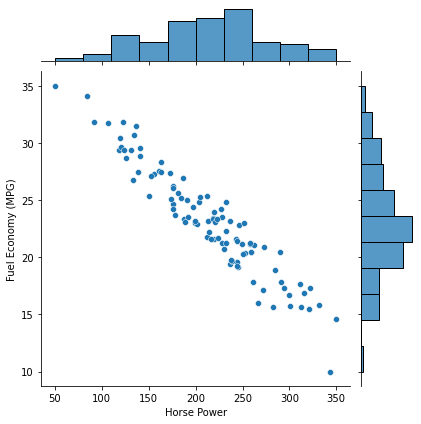

In [4]:
# plot jointplot

## Code

sns.jointplot(df['Horse Power'],df['Fuel Economy (MPG)'])

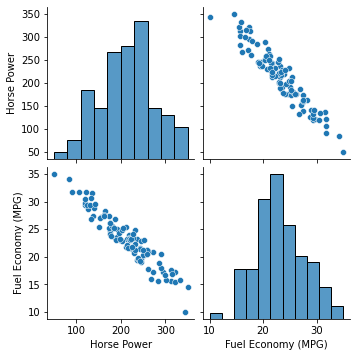

In [5]:
# Plot pairplot

## Code

sns.pairplot(data=df)

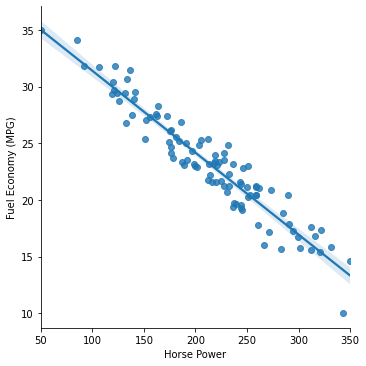

In [6]:
# Plot lmplot
## Code
sns.lmplot(data=df,x='Horse Power',y='Fuel Economy (MPG)')

# STEP#4: CREATE TESTING AND TRAINING DATASET

In [7]:
# Assgin independent Variable
X = df[['Horse Power']]
#X=X.values.reshape(-1,1)
X.shape

(100, 1)

In [8]:
# Assgin dependent Variable
y = df['Fuel Economy (MPG)']
#y=y.values.reshape(-1,1)
y.shape

(100,)

In [9]:
# Split the data set in train : test :: 70 : 30
## ! please keep random_state as 42

from sklearn.model_selection import train_test_split
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# STEP#5: TRAIN THE MODEL

In [10]:
X_train.shape
y_train.shape

(70,)

In [11]:
# Build the model and set fit_intercept = True.
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True).fit(X_train,y_train)

# fit the model
## Code

In [13]:
print("Linear Model Coefficient (m):", regressor.coef_)
print("Linear Model Coefficient(b):", regressor.intercept_)

Linear Model Coefficient (m): [-0.0732172]
Linear Model Coefficient(b): 38.83895884102216


In [14]:
# Assgin the value of cofficent

s1 = regressor.coef_ # assgin linear model coeff (m)
s2 = regressor.intercept_ # assgin linear model coeff (b)
print(s1,s2)

[-0.0732172] 38.83895884102216


In [15]:
# Run the cell to submit your solution
file=open("submit2.txt","w+")

s1=str(s1)
file.write(s1)
file.write("\n")

s2=str(s2)
file.write(s2)
file.write("\n")
file.close()

# STEP#6: TEST THE MODEL 

In [16]:
# Predict the value for X_test
y_predict=regressor.predict(X_test)

In [17]:
# plot scatter plot for test data and compare with train data

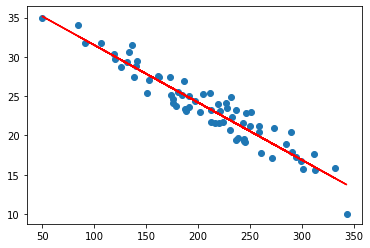

In [13]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train), color = "red")

In [21]:
# Predict the MPG for HP = [500]
HP = [500]
HP
# MPG?
MPG=regressor.predict([HP])
MPG

array([2.23036133])

In [22]:
def percentage_error(actual, predicted):
    res = np.empty(actual.shape)
    for j in range(actual.shape[0]):
        if actual[j] != 0:
            res[j] = (actual[j] - predicted[j]) / actual[j]
        else:
            res[j] = predicted[j] / np.mean(actual)
    return res

def mape(y_true, y_pred): 
    return np.mean(np.abs(percentage_error(np.asarray(y_true), np.asarray(y_pred)))) * 100

In [23]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = X_test.shape[1]
n = len(X_test)

## Evalutate the model

RMSE = round(sqrt(mean_squared_error(y_test, y_predict)),3)
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1 - (1-r2) * (len(y_test)-1)/(len(y_test)-k-1)
#MAPE = mean_absolute_percentage_error(y_test, y_predict)*100
MAPE = mape(y_test, y_predict)


print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMean Absolute Percentage Error =', MAPE, '%') 

RMSE = 1.294 
MSE = 1.674949971110833 
MAE = 1.0312709076950124 
R2 = 0.9133154290618397 
Adjusted R2 = 0.910219551528334 
Mean Absolute Percentage Error = 5.037387276261628 %


### Run the below cell to submit your solution

In [24]:
s3 = MPG # assgin MPG for HP = 500

file=open("submit3.txt","w+")

MPG=str(MPG)
file.write(MPG)
file.write("\n")
file.close()

In [25]:
file=open("submit.txt","w+")

RMSE=str(RMSE)
MSE=str(MSE)
MAE=str(MAE)
r2=str(r2)
adj_r2=str(adj_r2)
MAPE=str(MAPE)

file.write(RMSE)
file.write("\n")
file.write(MSE)
file.write("\n")
file.write(MAE)
file.write("\n")
file.write(r2)
file.write("\n")
file.write(adj_r2)
file.write("\n")
file.write(MAPE)
file.write("\n")
file.close()